In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize']=15,12
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [3]:
pyo.init_notebook_mode(connected=True)

In [4]:
cf.go_offline()

In [5]:
df=pd.read_excel(r"C:\Users\DELL\Documents\COVID-19 data analysis\Covid cases in India.xlsx")
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [6]:
df.drop('S. No.',inplace=True,axis=1)

In [7]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [8]:
df.columns

Index(['Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death'],
      dtype='object')

In [9]:
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
df.head()
df['Total cases'].sum()

729

In [10]:
df['Total Confirmed cases (Indian National)'].sum()+df['Total Confirmed cases ( Foreign National )'].sum()


729

In [11]:
df['Total active cases']=df['Total cases']-df['Cured']-df['Death']
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [12]:
df['Total active cases'].sum()

648

In [13]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [14]:
state_df=df[['Name of State / UT','Total active cases']]

In [15]:
state_df.style.background_gradient(cmap='Reds')
state_df.sort_values('Total active cases',ascending=False).style.background_gradient(cmap='Reds')

,Name of State / UT,Total active cases
9,Maharashtra,128
7,Kerala,127
15,Telengana,44
13,Rajasthan,40
3,Gujarat,40
14,Tamil Nadu,33
2,Delhi,32
19,Uttar Pradesh,32
12,Punjab,28
8,Madhya Pradesh,22


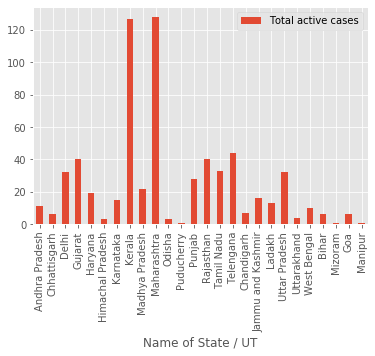

In [16]:
df.plot(x='Name of State / UT',y='Total active cases',kind='bar')

In [17]:
# plotly
df.iplot(x='Name of State / UT',y='Total active cases',kind='bar')

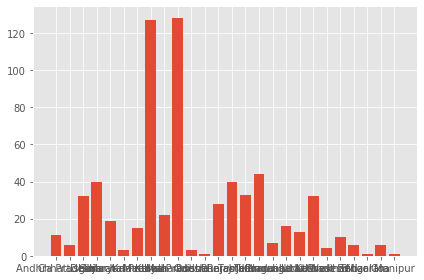

In [18]:
plt.bar(df['Name of State / UT'],df['Total active cases'])
plt.tight_layout()

In [19]:
px.bar(df,x='Name of State / UT',y='Total active cases')

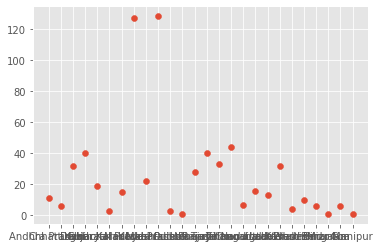

In [20]:
# matplotlib scatter
plt.scatter(df['Name of State / UT'],df['Total active cases'])

In [21]:
df.iplot(x='Name of State / UT',y='Total active cases',kind='scatter',mode='markers+lines',title='State-wise total cases',xTitle='State',yTitle='Number of total cases',colors='red',size=20)

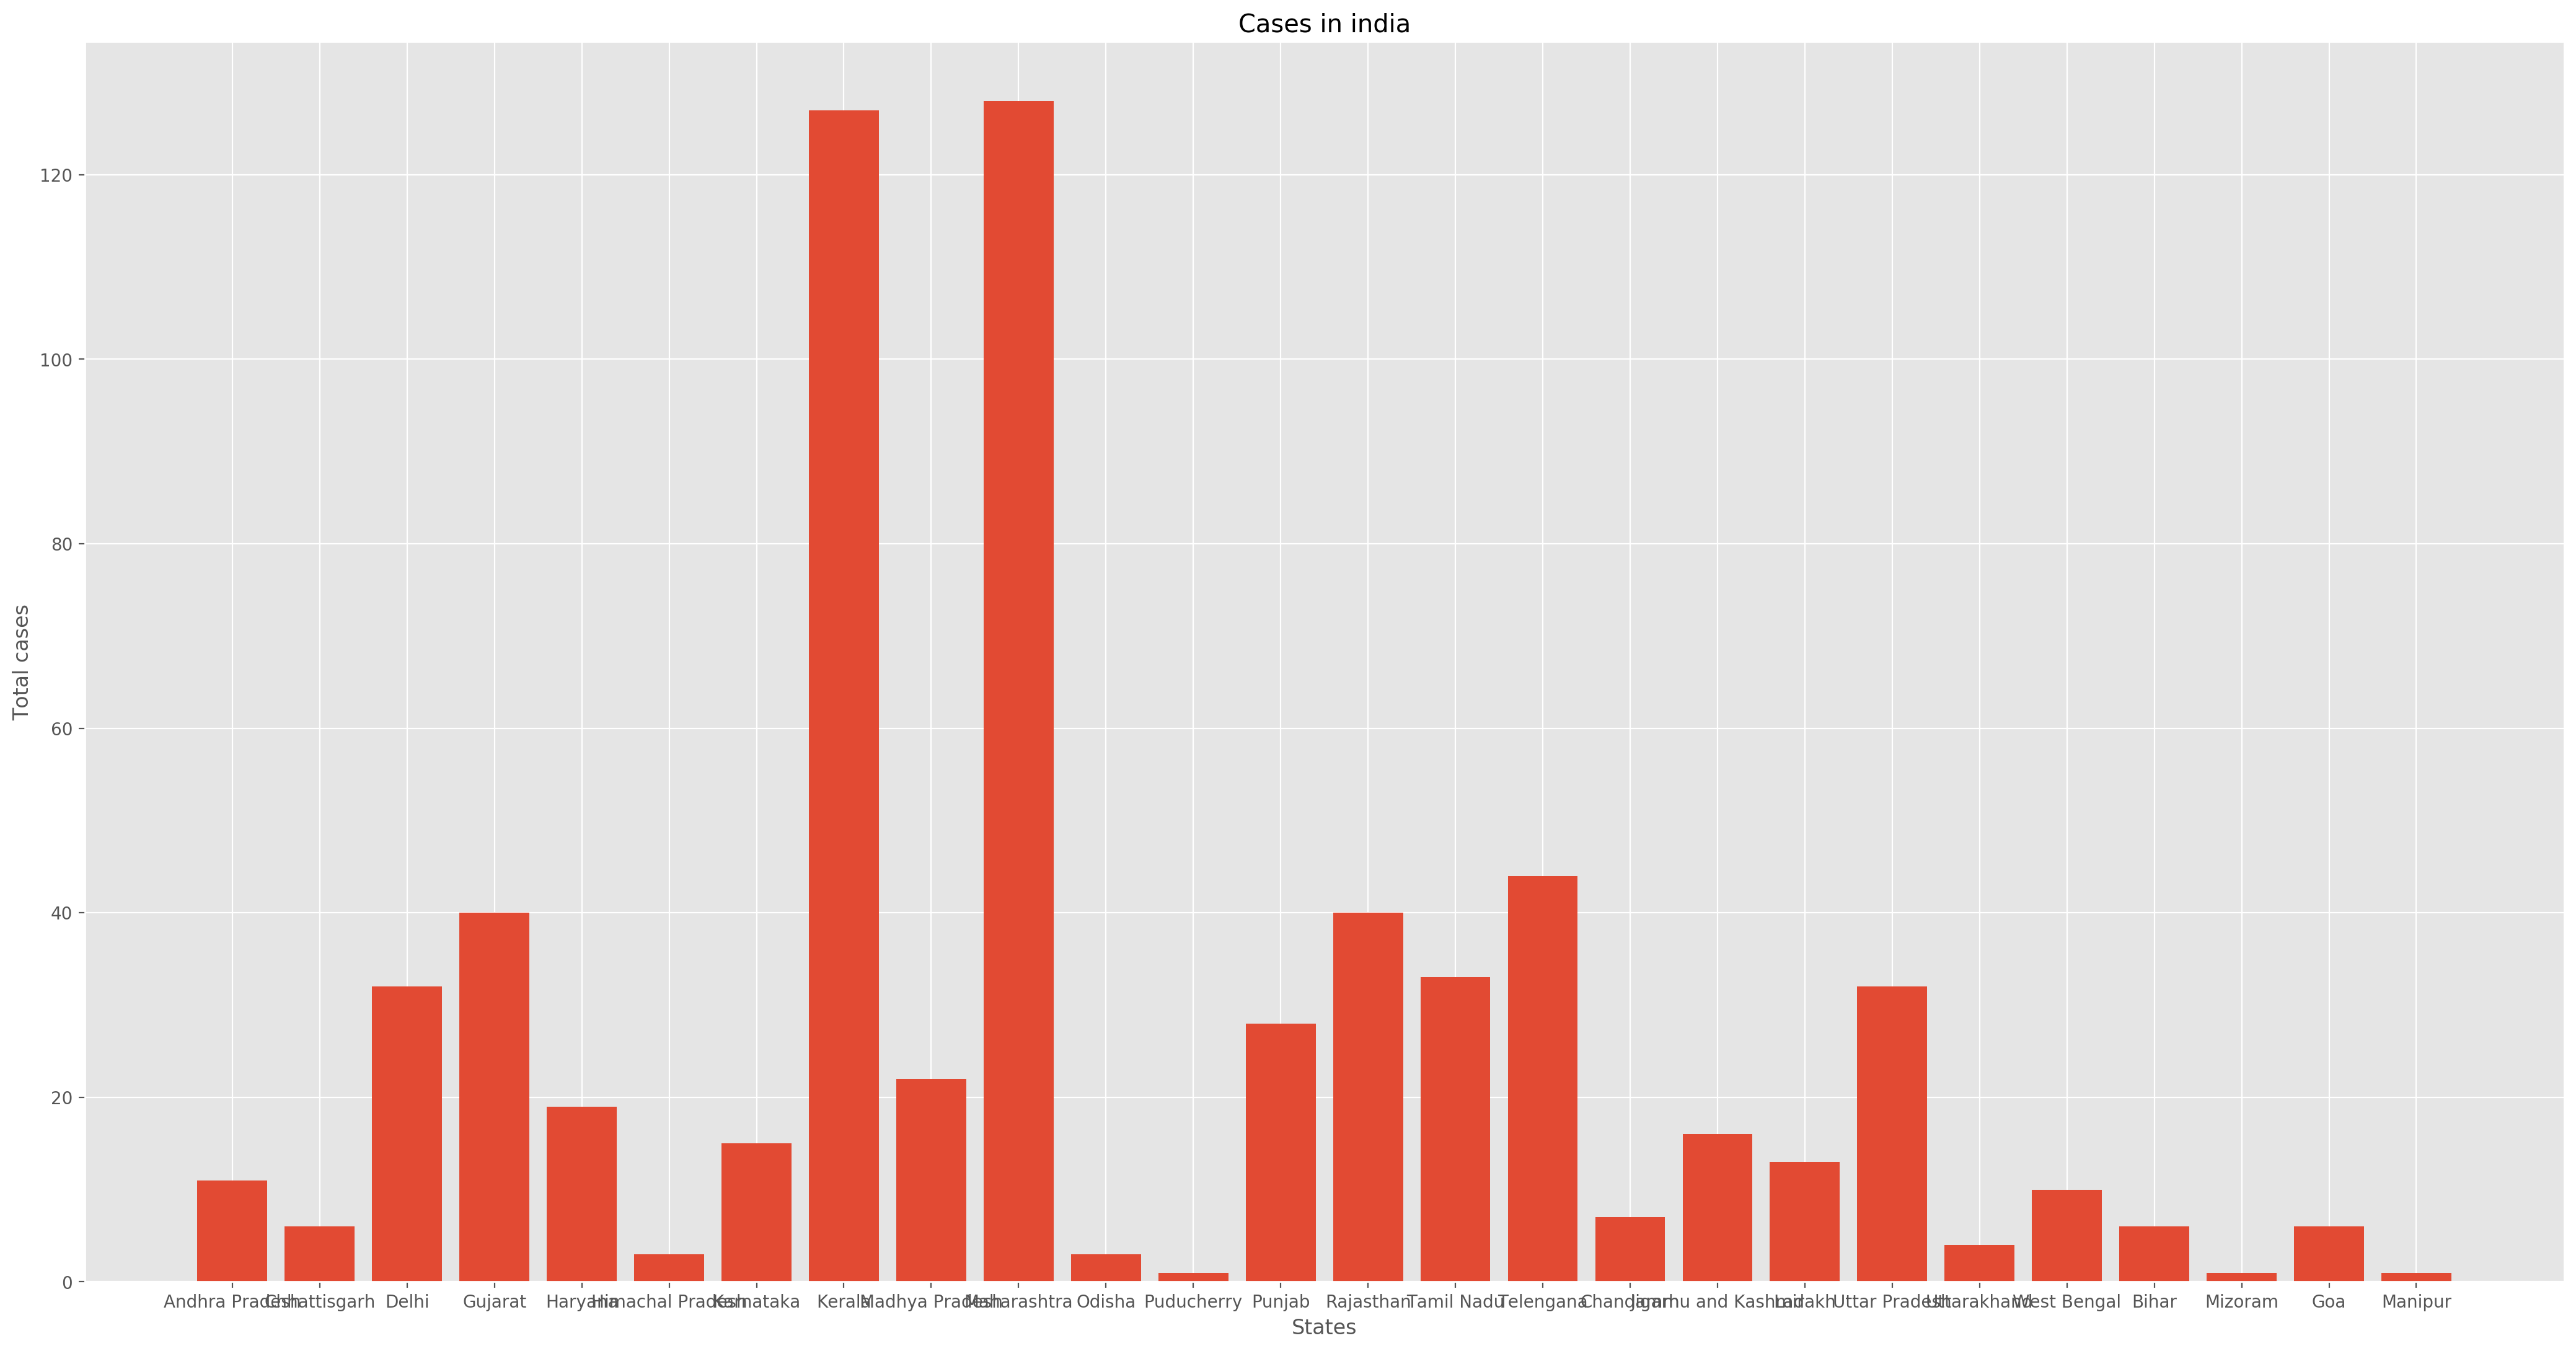

In [47]:
## oop viz
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total active cases'])
axes.set_title('Cases in india')
axes.set_xlabel('States')
axes.set_ylabel('Total cases')


##
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total active cases']))
fig.update_layout(title='state-wise cases in india',xaxis=dict(title='states'),yaxis=dict(title='number of cases'))

In [23]:
india_cords=pd.read_excel(r"C:\Users\DELL\Documents\COVID-19 data analysis\Indian Coordinates.xlsx")
india_cords.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [24]:
df_full=pd.merge(india_cords,df,on='Name of State / UT')

In [25]:
map = folium.Map(location=[20,70],zoom_start=4,tiles='Stamen Terrain')
for lat,long,name,value in zip(df_full['Latitude'],df_full['Longitude'],df_full['Name of State / UT'],df_full['Total cases']):
        folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)


In [26]:
map

In [32]:
dbd_india=pd.read_excel(r'C:\Users\DELL\Documents\COVID-19 data analysis\per_day_cases.xlsx',parse_dates=True,sheet_name='India')

In [28]:
dbd_Italy=pd.read_excel(r'C:\Users\DELL\Documents\COVID-19 data analysis\per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')

In [29]:
dbd_Korea=pd.read_excel(r'C:\Users\DELL\Documents\COVID-19 data analysis\per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')

In [30]:
dbd_Wuhan=pd.read_excel(r'C:\Users\DELL\Documents\COVID-19 data analysis\per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

In [34]:
dbd_india

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


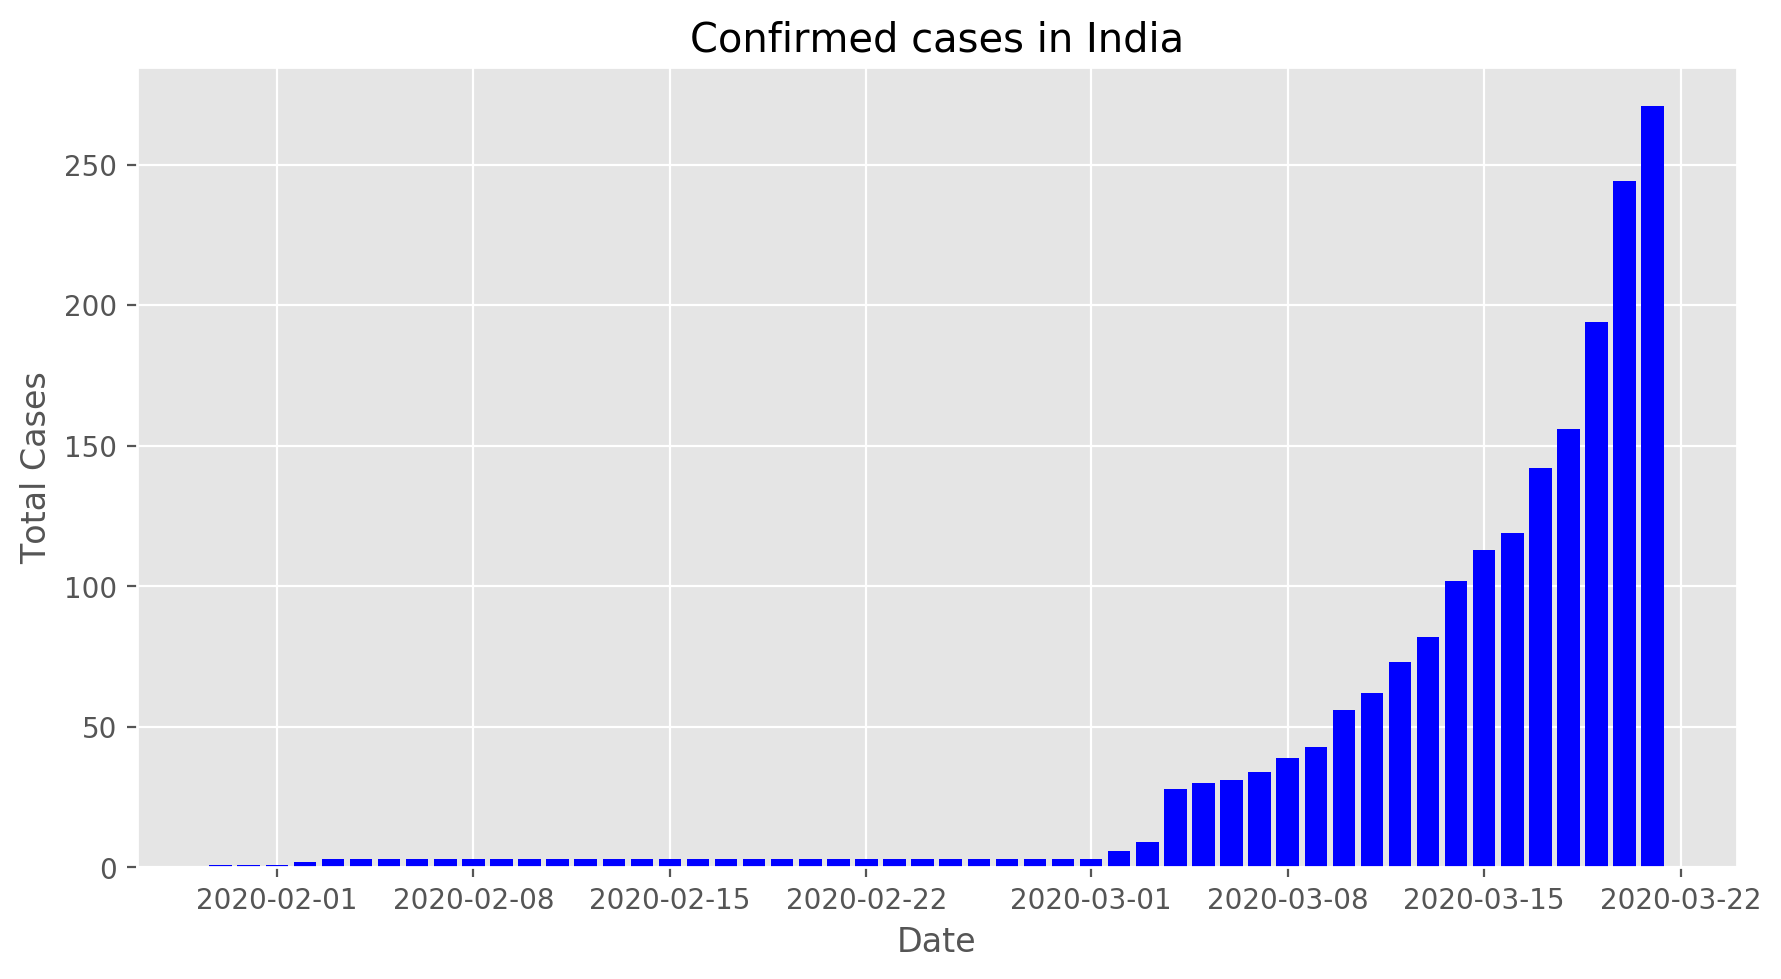

In [43]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_india['Date'],dbd_india['Total Cases'],color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Confirmed cases in India')

#plotly exp
fig=px.bar(dbd_india,x='Date',y='Total Cases',color='Total Cases')
fig.show()

In [44]:
fig=px.bar(dbd_Italy,x='Date',y='Total Cases',color='Total Cases')
fig.show()

In [45]:
fig=px.bar(dbd_Korea,x='Date',y='Total Cases',color='Total Cases')
fig.show()

In [46]:
fig=px.bar(dbd_Wuhan,x='Date',y='Total Cases',color='Total Cases')
fig.show()

In [51]:
dbd_india.iplot(x='Date',y='Total Cases',kind='scatter',mode='lines+markers')

In [67]:
from plotly.subplots import make_subplots
fig=make_subplots(rows=2,cols=2,specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
                 subplot_titles=('s.Korea','Italy','India','Wuhan'))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],marker=dict(color=dbd_Italy['Total Cases'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Bar(x=dbd_india['Date'],y=dbd_Korea['Total Cases'],marker=dict(color=dbd_india['Total Cases'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis='coloraxis')),2,2)



In [69]:
fig=make_subplots(rows=2,cols=2,specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
                 subplot_titles=('s.Korea','Italy','India','Wuhan'))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],marker=dict(color=dbd_Italy['Total Cases'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Scatter(x=dbd_india['Date'],y=dbd_Korea['Total Cases'],marker=dict(color=dbd_india['Total Cases'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Scatter(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis='coloraxis')),2,2)


In [72]:
df=pd.read_csv(r'C:\Users\DELL\Documents\COVID-19 data analysis\covid_19_data.csv',parse_dates=['Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


In [73]:
df[df['Country/Region']=='India']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [82]:
confirmed_cases=df.groupby('ObservationDate')['Confirmed'].sum().reset_index()
Death_cases=df.groupby('ObservationDate')['Deaths'].sum().reset_index()
Recovered_cases=df.groupby('ObservationDate')['Recovered'].sum().reset_index()
Recovered_cases

,ObservationDate,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0
5,01/27/2020,61.0
6,01/28/2020,107.0
7,01/29/2020,126.0
8,01/30/2020,143.0
9,01/31/2020,222.0


In [90]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed_cases['ObservationDate'],y=confirmed_cases['Confirmed'],name='Confirmed',mode='lines+markers',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=Death_cases['ObservationDate'],y=Death_cases['Deaths'],name='Death',mode='lines+markers',line=dict(color='red',width=2)))

fig.add_trace(go.Scatter(x=Recovered_cases['ObservationDate'],y=Recovered_cases['Recovered'],name='Recovered',mode='lines+markers',line=dict(color='green',width=2)))




In [94]:
df_confirmed=pd.read_csv(r'C:\Users\DELL\Documents\COVID-19 data analysis\time_series_covid_19_confirmed.csv')

In [100]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df.rename(columns={'Country/Region':'Country'},inplace=True)



In [101]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])


In [103]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="ObservationDate",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
